In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.svm import SVR

In [6]:
california_x, california_y = datasets.fetch_california_housing(return_X_y=True)

In [9]:
print(california_x.shape)
print(california_y.shape)

(20640, 8)
(20640,)


In [11]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
    california_x, california_y, test_size=0.2, random_state=42)

In [12]:
svr_rbf_malli = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=0.1)

In [13]:
svr_rbf_malli.fit(data_x_opetus, data_y_opetus)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
ennustukset_opetus = svr_rbf_malli.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
print(opetus_mse)

0.009471201581530014


In [15]:
ennustukset_validointi = svr_rbf_malli.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
print(validointi_mse)

1.101008354921722


In [18]:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

for i in range(1,10):
    data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
        california_x, california_y, test_size=0.2, random_state=689*i)
    
    svr_rbf_malli.fit(data_x_opetus, data_y_opetus)
    
    ennustukset_opetus = svr_rbf_malli.predict(data_x_opetus)
    opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
    opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)
    
    ennustukset_validointi = svr_rbf_malli.predict(data_x_validointi)
    validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
    validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [19]:
print(opetus_mse)
print('\n')
print(np.mean(opetus_mse))

[0.         0.00949582 0.00949985 0.00949472 0.00950848 0.0095006
 0.00949875 0.00947513 0.00947797 0.00947524]


0.008542655459540725


In [20]:
print(validointi_mse)
print('\n')
print(np.mean(validointi_mse))

[0.         1.16031723 1.06903298 1.11979451 1.08497241 1.1106265
 1.12253504 1.10317468 1.08072611 1.16984726]


1.0021026723846511


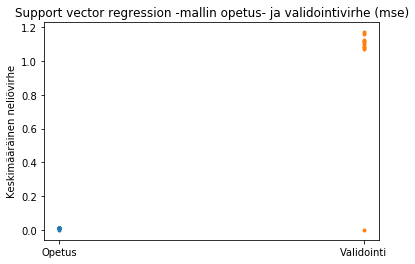

In [21]:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')

plt.title('Support vector regression -mallin opetus- ja validointivirhe (mse)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Keskimääräinen neliövirhe')

plt.show()

In [22]:
print(opetus_r2)
print('\n')
print(np.mean(opetus_r2))

[0.         0.99279421 0.99292928 0.99286482 0.99288669 0.99287832
 0.99283276 0.99291732 0.9929667  0.99284145]


0.8935911548233951


In [23]:
print(validointi_r2)
print('\n')
print(np.mean(validointi_r2))

[0.         0.16299169 0.16673198 0.16115142 0.1722756  0.15952876
 0.17221835 0.15567179 0.14680278 0.14151521]


0.1438887581815243


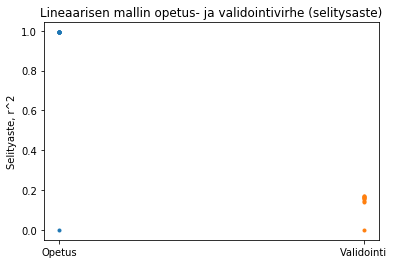

In [24]:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (selitysaste)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Selityaste, r^2')

plt.show()